downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


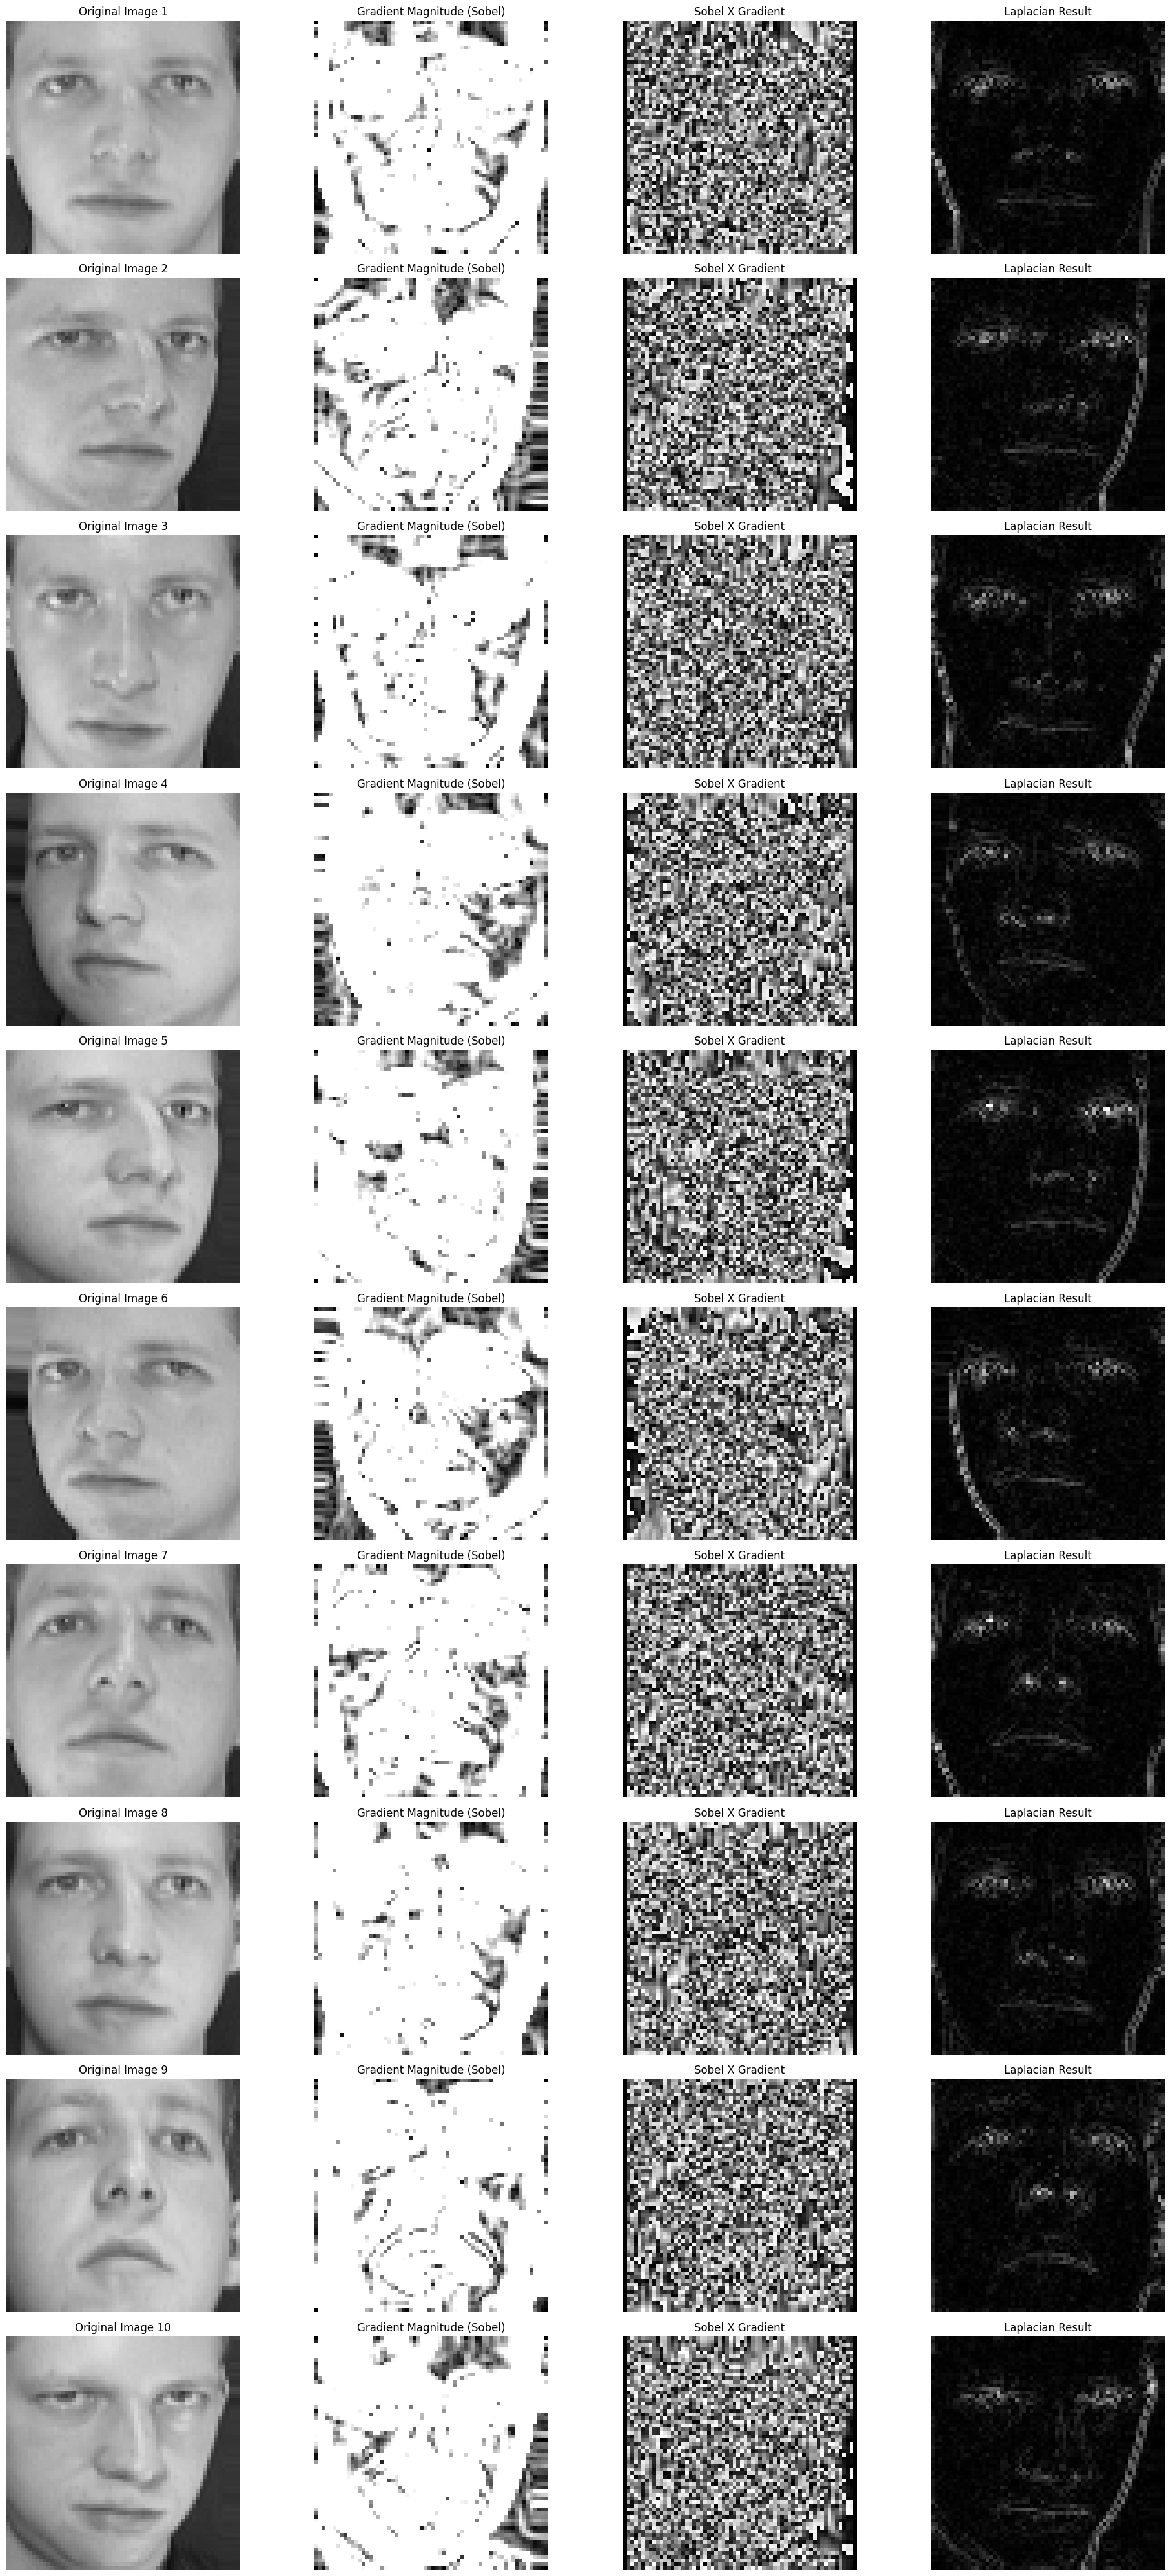

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import cv2

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces()
n_images = 10  # Number of images to process

# Prepare the figure for visualization
fig, ax = plt.subplots(n_images, 4, figsize=(20, 4 * n_images))

for i in range(n_images):
    # Select the ith face image for demonstration
    image = faces.images[i]
    
    # Convert the grayscale image to a NumPy array and scale it to [0, 255]
    image_np = (image * 255).astype(np.uint8)

    # Convert the grayscale image to a 3-channel image to simulate a "colored" effect
    colored_image = cv2.merge([image_np, image_np, image_np])

    # Apply the Sobel operator to compute gradients in x and y directions
    sobelx = cv2.Sobel(colored_image, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in x direction
    sobely = cv2.Sobel(colored_image, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in y direction

    # Combine the Sobel x and y gradients to compute the gradient magnitude
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)  # Convert back to uint8

    # Apply the Laplacian operator for a different edge enhancement
    laplacian = cv2.Laplacian(colored_image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)

    # Populate the subplots
    ax[i, 0].imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
    ax[i, 0].set_title(f"Original Image {i + 1}")
    ax[i, 0].axis('off')

    ax[i, 1].imshow(cv2.cvtColor(gradient_magnitude, cv2.COLOR_BGR2RGB))
    ax[i, 1].set_title("Gradient Magnitude (Sobel)")
    ax[i, 1].axis('off')

    ax[i, 2].imshow(cv2.cvtColor(sobelx.astype(np.uint8), cv2.COLOR_BGR2RGB))
    ax[i, 2].set_title("Sobel X Gradient")
    ax[i, 2].axis('off')

    ax[i, 3].imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
    ax[i, 3].set_title("Laplacian Result")
    ax[i, 3].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# Sobel Operator Explanation
The Sobel operator computes the gradient of image intensity in the x and y directions. For an image \( I \), the Sobel operators \( G_x \) and \( G_y \) are defined as:

$$
G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix} 
\quad \text{and} \quad 
G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

The gradient magnitude is then calculated as:

$$
\text{Gradient Magnitude} = \sqrt{G_x^2 + G_y^2}
$$

This gives us the intensity change in the x and y directions, highlighting edges aligned with those axes.

---

# Laplacian Operator Explanation
The Laplacian operator, unlike the Sobel, calculates the second derivative of the image intensity, capturing intensity changes in all directions simultaneously. It is defined as:

$$
\Delta I = \frac{d^2I}{dx^2} + \frac{d^2I}{dy^2}
$$

The discrete Laplacian kernel commonly used is:

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix} 
\quad \text{or sometimes} \quad 
\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

This operator is more effective in detecting fine details and textures because it is isotropic, meaning it responds equally in all directions.

---

# Conclusion
From the visualizations above:
- The Sobel operator is sensitive to edges oriented along the x and y axes, but it may miss edges or features that are not aligned with these directions.
- The Laplacian operator, being isotropic, detects changes uniformly, making it better suited for complex images with diverse patterns and orientations, like faces.

---

# Mathematical Proof of Laplacian Superiority
Consider an intensity function \( I(x, y) \) that varies smoothly across the image. The Sobel operator captures gradients:

$$
\text{Sobel}(I) = \left( \frac{dI}{dx}, \frac{dI}{dy} \right)
$$

If \( I \) changes predominantly in directions other than the x and y axes, the Sobel operator's response diminishes. However, the Laplacian captures the sum of second derivatives:

$$
\Delta I = \frac{d^2I}{dx^2} + \frac{d^2I}{dy^2}
$$

This approach allows the detection of variations regardless of direction, proving its effectiveness in more general cases.
